# Herkenning van cijfers met CNNs

- Minor Applied Artificial Intelligence 2023
- 14 maart 2023
- Frank Aldershoff & Michiel Bontenbal

## Importeer libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

from keras import models
from keras import layers

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D


## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(test_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
print(test_labels)

[7 2 1 ... 4 5 6]


In [5]:
test_labels.shape

(10000,)

## Prepareer de test images

In [7]:
test_images_enhanced = test_images.reshape(10000,28,28,1)

In [8]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de test labels

In [9]:
test_labels_encoded = to_categorical(test_labels)

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Laad het model uit een .h5 bestand

In [11]:
new_model = models.load_model("MNIST_LeNet5_model.h5")

In [12]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

<b>

Het model bestaat uit twee Conv2D-lagen gevolgd door twee AveragePooling2D-lagen, gevolgd door een Flatten-laag en drie Dense-lagen. Het totale aantal parameters in het model is 60,074.

In [14]:
loss, acc = new_model.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7530 - accuracy: 0.9889
0.9889000058174133


## Evalueer de voorspellingen

In [15]:
direct_predictions = new_model.predict(test_images_enhanced)

313/313 [==============================] - 1s 2ms/step


In [17]:
print(direct_predictions[1234])

[1.6291172e-11 3.4380161e-08 1.2010595e-05 1.1861767e-04 1.1839702e-12
 1.1000308e-05 4.2340744e-04 2.2946087e-10 9.9943465e-01 2.8320738e-07]


In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(true_label)
  # plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  #                               100*np.max(predictions_array),
  #                               class_names[true_label]),
  #                               color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(True)
  plt.xticks(range(10))
  plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [19]:
test_labels.shape

(10000,)

In [20]:
test_images.shape

(10000, 28, 28)

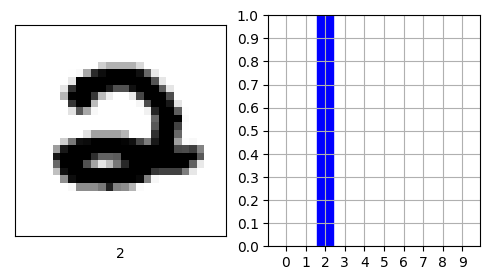

In [21]:
#select an image
i = 390
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

<b>

Uit deze plot kan ik zien dat het model 100% goed het getal(image) heeft geclasificeerd. 

In [22]:
direct_predictions.shape

(10000, 10)

In [23]:
mistakes = np.argmax(direct_predictions,axis=1) != test_labels.astype('int64')

In [25]:
np.count_nonzero(mistakes)

111

<b>

Er zijn 111 fouten die het model niet goed heeft voorgespeeld

In [26]:
mistakes_index = []

for index, value in enumerate(mistakes):
  if value == True:
    mistakes_index.append(index)
    
print(mistakes_index)

[92, 119, 247, 321, 340, 445, 495, 582, 583, 659, 674, 947, 1014, 1039, 1182, 1226, 1232, 1260, 1299, 1319, 1393, 1438, 1523, 1621, 1709, 1790, 1878, 1901, 1903, 1968, 2035, 2070, 2084, 2118, 2130, 2135, 2182, 2185, 2326, 2406, 2414, 2597, 2654, 2760, 2771, 2894, 2896, 2939, 2953, 2990, 3060, 3266, 3451, 3503, 3780, 3906, 3985, 4027, 4163, 4176, 4199, 4207, 4289, 4369, 4477, 4497, 4507, 4536, 4578, 4604, 4639, 4740, 4823, 4860, 4942, 5331, 5600, 5634, 5642, 5752, 5937, 5973, 5981, 5982, 5997, 6004, 6091, 6560, 6576, 6597, 6625, 6651, 6783, 7049, 7216, 7354, 7545, 8059, 8128, 8325, 8408, 8527, 9009, 9015, 9587, 9634, 9692, 9729, 9792, 9811, 9839]


**OPDRACHT**: evalueer de distributie van **10** foute voorspellingen.

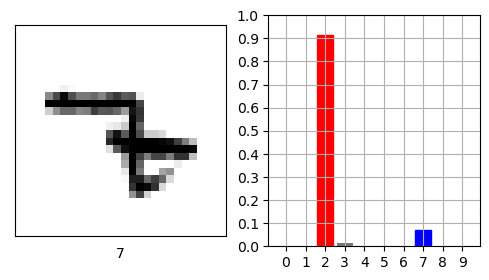

In [26]:
i = 1903
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

<b>

Het model heeft 2 voorspeld terwijl het 7 zou moeten zijn. Het is mij duidelijk dat het een 7 is. Het model kan een 2 hebben voorspeld omdat het geschreven getal aan het eind een klein streepje heeft.

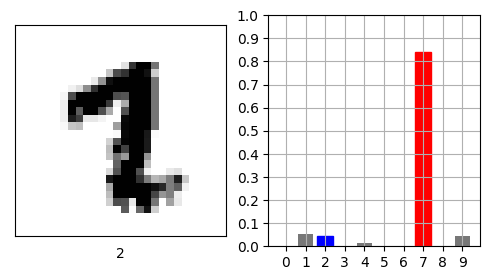

In [27]:
i = 659
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

<b>

Hier heeft het model het tegenovergestelde van de vorige fout. Hier zou het model 2 moeten voorspellen en niet 7. Misschien komt het omdat er geen kromme lijn in het getal zit.

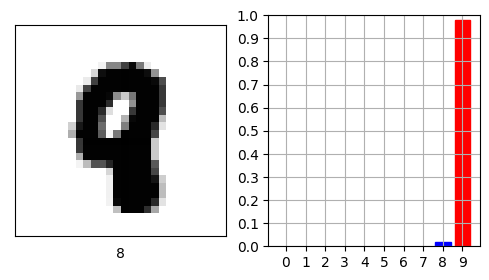

In [29]:
i = 947
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

<b>
Het model heeft 9 voorspeld terwijl het 8 moeten zijn. Voor mij is het duidelijk een 9, dus ik weet ook niet waar het fout is gegaan.

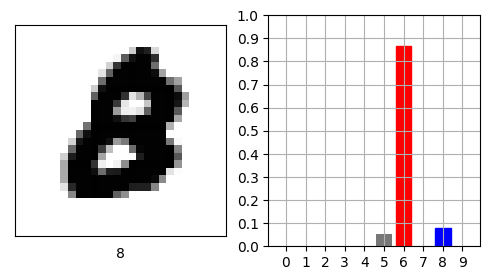

In [30]:
i = 495
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

<b>
Het model heeft 6 voorspeld terwijl het 8 moeten zijn. Voor mij is het duidelijk een 8. 

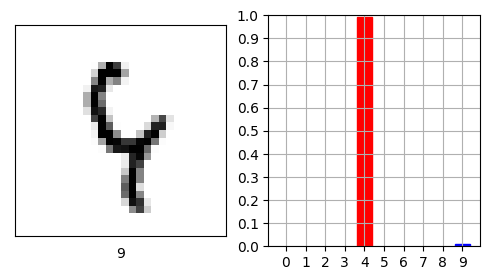

In [31]:
i = 1901
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

<b>
Het model heeft 4 voorspeld terwijl het 9 moeten zijn. Voor mij is het duidelijk een 4. Maar misschien heeft het model een 9 voorspeld door het manier waarop het getal geschreven is.

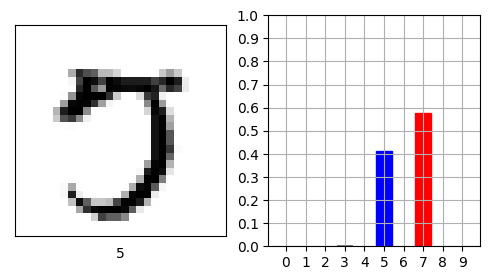

In [32]:
i = 1299
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

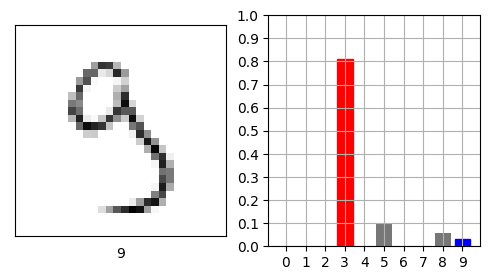

In [33]:
i = 1709
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

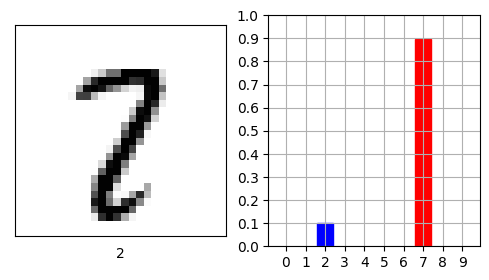

In [34]:
i = 321
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

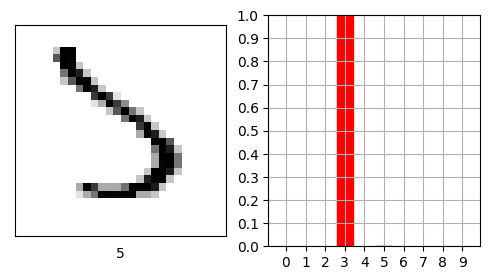

In [35]:
i = 1393
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

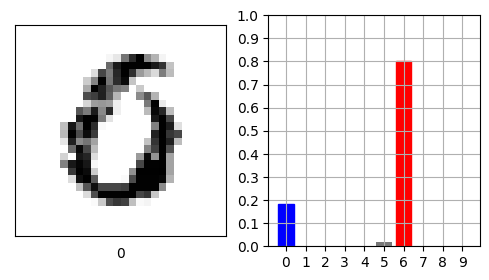

In [36]:
i = 1438
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()